In [1]:
#Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from IPython.display import clear_output
import zipfile

import tensorflow as tf

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from tqdm import tqdm

import warnings

In [2]:
RunningInCOLAB = 'google.colab' in str(get_ipython()) if hasattr(__builtins__,'__IPYTHON__') else False

if RunningInCOLAB:
  #We are running this on Google Colab
  from google.colab import drive
  drive.mount('/content/drive')
  project_dir='/content/drive/MyDrive/Tuhin/AI-ML Course - UT Austin/Projects/8-Computer Vision' #Our project directory is mounted here
else:
  #We are running in local machine
  project_dir='.' #Our project directory is local directory

In [3]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file
        #Person name : this is done by removing prefix pins_ from the file name
        self.person_name = name.split('_')[1]

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)


In [4]:
#Unzip the file PINS.zip into session
pins_zip = f'{project_dir}/PINS.zip' # Google Drive path

#We will extract to local folder, loading image from google drive is time consuming
pins_extract_folder = 'PINS'

In [5]:
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

#Now load the metadata for the images from 'PINS/PINS' folder (the PINS.zip folder unzipped into 'PINS' folder, which contents another PINS folder with images)
pins_folder = f'{pins_extract_folder}/PINS'

metadata = load_metadata(pins_folder)



In [8]:
def load_image(path):
    img = cv2.imread(path, 1)
    plt.imshow(img)
    plt.show()
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

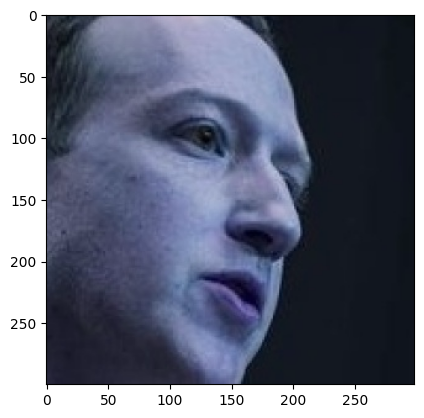

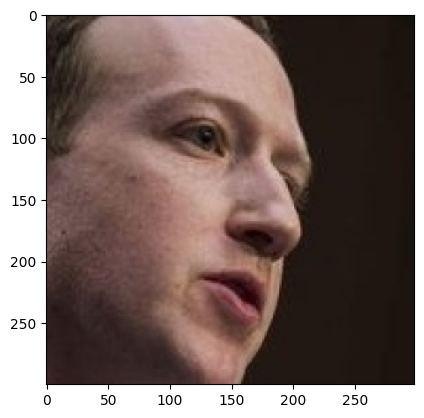

array([[[67, 56, 50],
        [62, 51, 45],
        [56, 45, 39],
        ...,
        [22, 19, 12],
        [22, 19, 12],
        [23, 18, 12]],

       [[65, 54, 48],
        [64, 53, 47],
        [56, 45, 39],
        ...,
        [22, 19, 12],
        [22, 19, 12],
        [23, 18, 12]],

       [[61, 50, 46],
        [59, 48, 44],
        [47, 36, 30],
        ...,
        [23, 18, 12],
        [23, 18, 12],
        [23, 18, 12]],

       ...,

       [[60, 40, 41],
        [60, 40, 41],
        [56, 36, 37],
        ...,
        [30, 21, 16],
        [31, 22, 17],
        [31, 22, 17]],

       [[60, 40, 41],
        [60, 40, 41],
        [57, 37, 38],
        ...,
        [30, 21, 16],
        [31, 22, 17],
        [31, 22, 17]],

       [[61, 41, 42],
        [60, 40, 41],
        [57, 37, 38],
        ...,
        [30, 21, 16],
        [31, 22, 17],
        [31, 22, 17]]], dtype=uint8)

In [10]:
# Print the first image to check
img = load_image(metadata[0].image_path())
plt.imshow(img)
plt.show()

img